<a href="https://colab.research.google.com/github/machineGroup/image-super-resolution/blob/master/srcnnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#change directory 
cd drive/My Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
from skimage.measure import compare_ssim as ssim
from matplotlib import pyplot as plt
import cv2
import numpy as np
import math
import os

# python magic function, displays pyplot figures in the notebook
%matplotlib inline

In [0]:
# define a function for peak signal-to-noise ratio (PSNR)
def psnr(target, ref):
         
    # assume RGB image
    target_data = target.astype(float)
    ref_data = ref.astype(float)

    diff = ref_data - target_data
    diff = diff.flatten('C')

    rmse = math.sqrt(np.mean(diff ** 2.))

    return 20 * math.log10(255. / rmse)

# define function for mean squared error (MSE)
def mse(target, ref):
    # the MSE between the two images is the sum of the squared difference between the two images
    err = np.sum((target.astype('float') - ref.astype('float')) ** 2)
    err /= float(target.shape[0] * target.shape[1])
    
    return err

# define function that combines all three image quality metrics
def compare_images(target, ref):
    scores = []
    scores.append(psnr(target, ref))
    scores.append(mse(target, ref))
    scores.append(ssim(target, ref, multichannel =True))
    
    return scores

In [0]:
# prepare degraded images by introducing quality distortions via resizing

def prepare_images(path, factor):
    
    # loop through the files in the directory
    for file in os.listdir(path):
        
        # open the file
        img = cv2.imread(path + '/' + file)
        
        # find old and new image dimensions
        h, w, _ = img.shape
        new_height = int(h / factor)
        new_width = int(w / factor)
        
        # resize the image - down
        img = cv2.resize(img, (new_width, new_height), interpolation = cv2.INTER_LINEAR)
        
        # resize the image - up
        img = cv2.resize(img, (w, h), interpolation = cv2.INTER_LINEAR)
        
        # save the image
        print('Saving {}'.format(file))
        cv2.imwrite('images/{}'.format(file), img)

In [0]:
prepare_images('source/', 2)

Saving t1.bmp
Saving t13.bmp
Saving t14.bmp
Saving t15.bmp
Saving t16.bmp
Saving t17.bmp
Saving t18.bmp
Saving t19.bmp
Saving t2.bmp
Saving t20.bmp
Saving t21.bmp
Saving t22.bmp
Saving t24.bmp
Saving t25.bmp
Saving t26.bmp
Saving t27.bmp
Saving t28.bmp
Saving t29.bmp
Saving t3.bmp
Saving t30.bmp
Saving t32.bmp
Saving t34.bmp
Saving t35.bmp
Saving t36.bmp
Saving t37.bmp
Saving t38.bmp
Saving t39.bmp
Saving t4.bmp
Saving t40.bmp
Saving t42.bmp
Saving t43.bmp
Saving t44.bmp
Saving t45.bmp
Saving t46.bmp
Saving t47.bmp
Saving t48.bmp
Saving t49.bmp
Saving t5.bmp
Saving t50.bmp
Saving t51.bmp
Saving t52.bmp
Saving t53.bmp
Saving t54.bmp
Saving t58.bmp
Saving t59.bmp
Saving t60.bmp
Saving t61.bmp
Saving t62.bmp
Saving t63.bmp
Saving t65.bmp
Saving t66.bmp
Saving t7.bmp
Saving tt1.bmp
Saving tt13.bmp
Saving tt17.bmp
Saving tt19.bmp
Saving tt2.bmp
Saving tt20.bmp
Saving tt21.bmp
Saving tt24.bmp
Saving tt25.bmp
Saving tt26.bmp
Saving tt27.bmp
Saving tt3.bmp
Saving tt4.bmp
Saving tt5.bmp
Saving 

In [0]:
# test the generated images using the image quality metrics

for file in os.listdir('images/'):
    
    # open target and reference images
    target = cv2.imread('images/{}'.format(file))
    ref = cv2.imread('source/{}'.format(file))
    
    # calculate score
    scores = compare_images(target, ref)

    # print all three scores with new line characters (\n) 
    print('{}\nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(file, scores[0], scores[1], scores[2]))

tt17.bmp
PSNR: 28.083885363242487
MSE: 303.2585675658681
SSIM: 0.8695864358250414

tt2.bmp
PSNR: 31.886762250643244
MSE: 126.33549622311091
SSIM: 0.8937208389746222

tt20.bmp
PSNR: 24.547058288757555
MSE: 684.692840542431
SSIM: 0.852040919034695

tt3.bmp
PSNR: 31.796431529877243
MSE: 128.99071872109923
SSIM: 0.8911993528294895

tt25.bmp
PSNR: 31.606723521294132
MSE: 134.75015190972223
SSIM: 0.8858043299093885

tt21.bmp
PSNR: 28.096466673286137
MSE: 302.38131283449695
SSIM: 0.9153654396093426

tt26.bmp
PSNR: 29.64865230420129
MSE: 211.51266884805773
SSIM: 0.9194138956023451

tt24.bmp
PSNR: 35.46079924601212
MSE: 55.47811429936559
SSIM: 0.9222336176104958

tt27.bmp
PSNR: 34.450705073256586
MSE: 70.00533017471128
SSIM: 0.9453938210894347

tt4.bmp
PSNR: 32.46285097296592
MSE: 110.64110850600933
SSIM: 0.9400041768311506

tt19.bmp
PSNR: 29.493739410989647
MSE: 219.19350157728707
SSIM: 0.8394822974561068

t66.bmp
PSNR: 34.884758104181586
MSE: 63.34696395296537
SSIM: 0.9321966488563332

tt13.b

In [0]:
# define the SRCNN model
def model():
    
    # define model type
    SRCNN = Sequential()
    
    # add model layers
    SRCNN.add(Conv2D(filters=128, kernel_size = (9, 9), kernel_initializer='glorot_uniform',
                     activation='relu', padding='valid', use_bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(filters=64, kernel_size = (3, 3), kernel_initializer='glorot_uniform',
                     activation='relu', padding='same', use_bias=True))
    SRCNN.add(Conv2D(filters=1, kernel_size = (5, 5), kernel_initializer='glorot_uniform',
                     activation='linear', padding='valid', use_bias=True))
    
    # define optimizer
    adam = Adam(lr=0.0003)
    
    # compile model
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    return SRCNN

In [0]:
# define necessary image processing functions

def modcrop(img, scale):
    tmpsz = img.shape
    sz = tmpsz[0:2]
    sz = sz - np.mod(sz, scale)
    img = img[0:sz[0], 1:sz[1]]
    return img


def shave(image, border):
    img = image[border: -border, border: -border]
    return img

In [0]:
# define main prediction function

def predict(image_path):
    
    # load the srcnn model with weights
    srcnn = model()
    srcnn.load_weights('3051crop_weight_200.h5')
    
    # load the degraded and reference images
    path, file = os.path.split(image_path)
    degraded = cv2.imread(image_path)
    ref = cv2.imread('source/{}'.format(file))
    
    # preprocess the image with modcrop
    ref = modcrop(ref, 3)
    degraded = modcrop(degraded, 3)
    
    # convert the image to YCrCb - (srcnn trained on Y channel)
    temp = cv2.cvtColor(degraded, cv2.COLOR_BGR2YCrCb)
    
    # create image slice and normalize  
    Y = np.zeros((1, temp.shape[0], temp.shape[1], 1), dtype=float)
    Y[0, :, :, 0] = temp[:, :, 0].astype(float) / 255
    
    # perform super-resolution with srcnn
    pre = srcnn.predict(Y, batch_size=1)
    
    # post-process output
    pre *= 255
    pre[pre[:] > 255] = 255
    pre[pre[:] < 0] = 0
    pre = pre.astype(np.uint8)
    
    # copy Y channel back to image and convert to BGR
    temp = shave(temp, 6)
    temp[:, :, 0] = pre[0, :, :, 0]
    output = cv2.cvtColor(temp, cv2.COLOR_YCrCb2BGR)
    
    # remove border from reference and degraged image
    ref = shave(ref.astype(np.uint8), 6)
    degraded = shave(degraded.astype(np.uint8), 6)
    
    # image quality calculations
    scores = []
    scores.append(compare_images(degraded, ref))
    scores.append(compare_images(output, ref))
    
    # return images and scores
    return ref, degraded, output, scores

Degraded Image: 
PSNR: 39.00767561319761
MSE: 24.51512174061916
SSIM: 0.9712307204928484

Reconstructed Image: 
PSNR: 40.774215172041
MSE: 16.322252741117886
SSIM: 0.9780137904285112



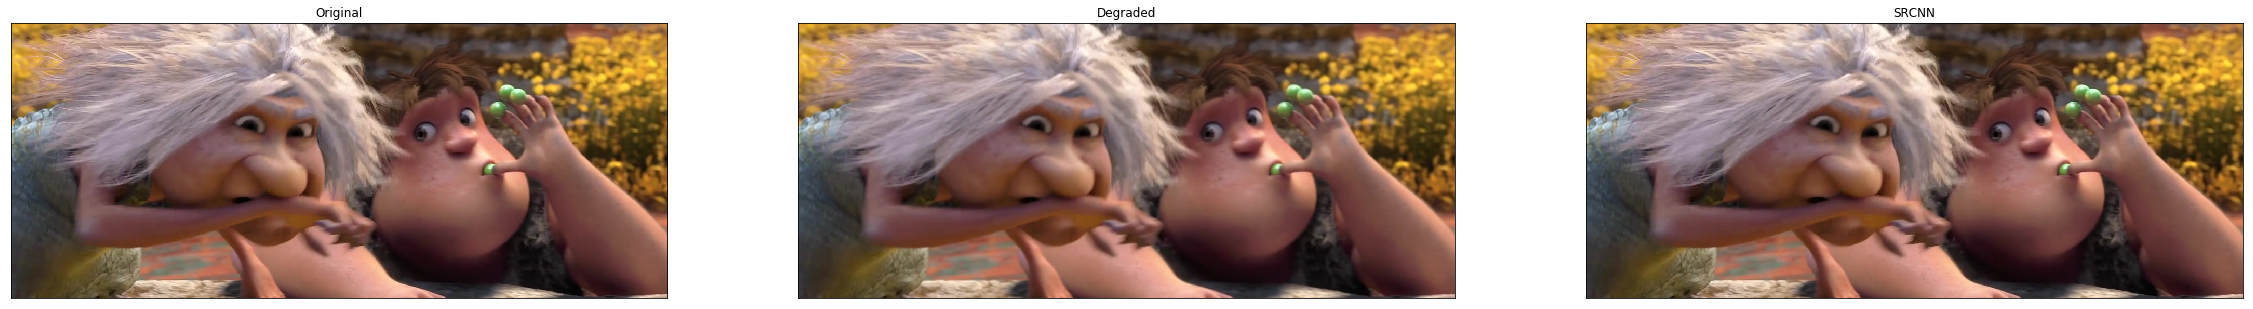

In [0]:
ref, degraded, output, scores = predict('images/The Croods (2013) 1237.jpg')

# print all scores for all images
print('Degraded Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[0][0], scores[0][1], scores[0][2]))
print('Reconstructed Image: \nPSNR: {}\nMSE: {}\nSSIM: {}\n'.format(scores[1][0], scores[1][1], scores[1][2]))


# display images as subplots
fig, axs = plt.subplots(1, 3, figsize=(40, 16))
axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
axs[1].set_title('Degraded')
axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
axs[2].set_title('SRCNN')

# remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

In [0]:
for file in os.listdir('images'):
    
    # perform super-resolution
    ref, degraded, output, scores = predict('images/{}'.format(file))
    
    # display images as subplots
    fig, axs = plt.subplots(1, 3, figsize=(30, 12))
    axs[0].imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original')
    axs[1].imshow(cv2.cvtColor(degraded, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Degraded')
    axs[1].set(xlabel = 'PSNR: {}\nMSE: {} \nSSIM: {}'.format(scores[0][0], scores[0][1], scores[0][2]))
    axs[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    axs[2].set_title('SRCNN')
    axs[2].set(xlabel = 'PSNR: {} \nMSE: {} \nSSIM: {}'.format(scores[1][0], scores[1][1], scores[1][2]))

    # remove the x and y ticks
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])
      
    print('Saving {}'.format(file))
    fig.savefig('output/{}.png'.format(os.path.splitext(file)[0])) 
    plt.close()

Saving tt17.bmp
Saving tt2.bmp
Saving tt20.bmp
Saving tt3.bmp
Saving tt25.bmp
Saving tt21.bmp
Saving tt26.bmp
Saving tt24.bmp
Saving tt27.bmp
Saving tt4.bmp
Saving tt19.bmp
Saving t66.bmp
Saving tt13.bmp
Saving t7.bmp
Saving tt1.bmp
Saving t65.bmp
Saving t4.bmp
Saving t39.bmp
Saving t46.bmp
Saving t47.bmp
Saving t42.bmp
Saving t48.bmp
Saving t43.bmp
Saving t44.bmp
Saving t40.bmp
Saving t45.bmp
Saving t5.bmp
Saving t54.bmp
Saving t51.bmp
Saving t60.bmp
Saving t53.bmp
Saving t58.bmp
Saving t59.bmp
Saving t63.bmp
Saving t50.bmp
Saving t61.bmp
Saving t62.bmp
Saving t52.bmp
Saving t49.bmp
Saving The Croods (2013) 1635.jpg
Saving t2.bmp
Saving t19.bmp
Saving t35.bmp
Saving t24.bmp
Saving t36.bmp
Saving t30.bmp
Saving t25.bmp
Saving t20.bmp
Saving t18.bmp
Saving t17.bmp
Saving t3.bmp
Saving t29.bmp
Saving t32.bmp
Saving t26.bmp
Saving t37.bmp
Saving t27.bmp
Saving t22.bmp
Saving t34.bmp
Saving t38.bmp
Saving t16.bmp
Saving t21.bmp
Saving The Croods (2013) 1237.jpg
Saving Wonder.Woman.2017.720